# Practice 12
### Principal Component Analysis 

#### 1. Review of Eigenvectors and Eigenvalues
#### 2. Import Yield Curve data, and compute Covariance matrix for the Variations
#### 3. Perform PCA
#### 4. Principal components impact on the Yield curve

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#### 1. Review of Eigenvectors and Eigenvalues

In [2]:
B = np.random.rand(3,3) # Generate random square matrix
A = (B + B.T)/2
print(A)

[[0.03534827 0.19650344 0.68844639]
 [0.19650344 0.77553247 0.61744649]
 [0.68844639 0.61744649 0.31919554]]


In [3]:
eig_val, eig_vec = np.linalg.eig(A)

print("Eigenvalues are:", eig_val)
print("Eigenvector are:")
print(eig_vec) #imaginary unit

Eigenvalues are: [ 1.446172   -0.57687874  0.26078304]
Eigenvector are:
[[-0.39520629 -0.70010576  0.59469649]
 [-0.68218092 -0.20987234 -0.70041615]
 [-0.61517573  0.68249947  0.39465592]]


In [5]:
# Check 1: A @ v = lambda * v #lambda is the eigenvalues

eig_vec_1 = eig_vec[:,0] # Select the first eigenvector
eig_val_1 = eig_val[0] # Select the first eigenvalue

if (np.round(A @ eig_vec_1, 8) == np.round(eig_val_1 * eig_vec_1, 8)).all():
    print("Eigenvector 1 and Eigenvalue 1 satisfy Av=lambda v")
else:
    print("Error")
    

Eigenvector 1 and Eigenvalue 1 satisfy Av=lambda v


### 2. Import Yield Curve data, and compute Covariance matrix for the Variations

In [6]:
# Yield curve - 30 Time to Maturities from 1 to 30 years

data = pd.read_csv("Yield_curve_.csv", index_col=0, parse_dates=True) 
data.index =  pd.to_datetime(data.index)                              
data.head()

C:\Users\Obi Wan Kenobi\AppData\Local\Temp\ipykernel_18756\3944747882.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("Yield_curve_.csv", index_col=0, parse_dates=True)


,OBS_VALUE,Tau
TIME_PERIOD,,
2020-01-02,-0.634844,1
2020-01-02,-0.622180,2
2020-01-02,-0.586872,3
2020-01-02,-0.536992,4
2020-01-02,-0.478606,5


In [7]:
# Select only values, and reshape data --> each row is a day, each column is a time to maturity

tau = list(data.groupby(data["Tau"]).first().index) # obtain the different value of tau
tau_list = []
for i in range(0,len(tau)):
    mat = str(tau[i]) + "_Years"
    tau_list.append(mat)

yield_curve = pd.DataFrame(data["OBS_VALUE"].values.T.reshape(int(len(data)/30), 30)) 
yield_curve.index = (data.groupby(data.index).first()).index # Set index
yield_curve.columns = tau_list # Rename columns 
yield_curve.head()

,1_Years,2_Years,3_Years,4_Years,5_Years,6_Years,7_Years,8_Years,9_Years,10_Years,...,21_Years,22_Years,23_Years,24_Years,25_Years,26_Years,27_Years,28_Years,29_Years,30_Years
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.634844,-0.622180,-0.586872,-0.536992,-0.478606,-0.416130,-0.352676,-0.290354,-0.230523,-0.173995,...,0.220436,0.240933,0.259815,0.277245,0.293369,0.308316,0.322203,0.335131,0.347191,0.358465
2020-01-03,-0.630324,-0.638365,-0.615900,-0.573932,-0.520394,-0.460882,-0.399247,-0.338059,-0.278958,-0.222926,...,0.169100,0.189447,0.208188,0.225486,0.241485,0.256316,0.270092,0.282917,0.294881,0.306064
2020-01-06,-0.637580,-0.651086,-0.632549,-0.593362,-0.541757,-0.483556,-0.422779,-0.362122,-0.303321,-0.247426,...,0.145927,0.166405,0.185270,0.202683,0.218791,0.233723,0.247595,0.260509,0.272556,0.283818
2020-01-07,-0.641443,-0.650553,-0.628580,-0.586666,-0.532864,-0.472872,-0.410620,-0.348734,-0.288900,-0.232130,...,0.165790,0.186463,0.205506,0.223083,0.239340,0.254411,0.268411,0.281443,0.293601,0.304965
2020-01-08,-0.633612,-0.641188,-0.616714,-0.571974,-0.515378,-0.452799,-0.388244,-0.324356,-0.262807,-0.204580,...,0.200261,0.221187,0.240457,0.258240,0.274685,0.289927,0.304085,0.317264,0.329557,0.341047


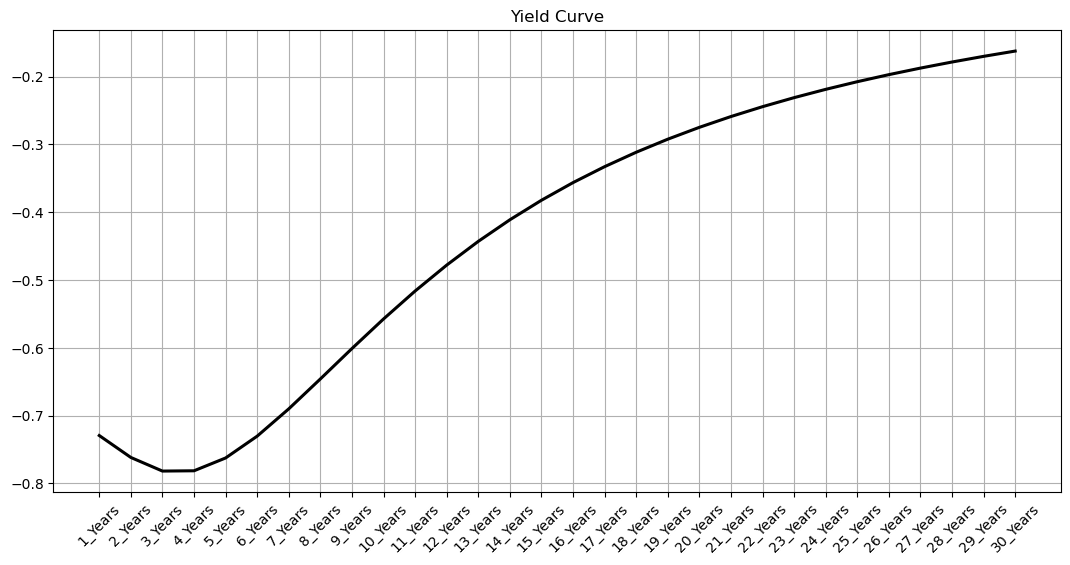

In [8]:
# Plot yield curve last day

plt.figure(figsize=(13, 6))
plt.plot(tau_list, np.array(yield_curve.iloc[-1]), "k", linewidth=2.2) 
plt.grid()
plt.xticks(rotation=45) 
plt.title("Yield Curve")
plt.show()

In [9]:
# Compute variations delta_i (first difference)

delta_i = yield_curve-yield_curve.shift(1)  
delta_i.head()

,1_Years,2_Years,3_Years,4_Years,5_Years,6_Years,7_Years,8_Years,9_Years,10_Years,...,21_Years,22_Years,23_Years,24_Years,25_Years,26_Years,27_Years,28_Years,29_Years,30_Years
TIME_PERIOD,,,,,,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.004520,-0.016185,-0.029028,-0.036940,-0.041788,-0.044752,-0.046571,-0.047705,-0.048435,-0.048931,...,-0.051336,-0.051486,-0.051627,-0.051759,-0.051884,-0.052001,-0.052111,-0.052214,-0.052311,-0.052402
2020-01-06,-0.007256,-0.012721,-0.016648,-0.019430,-0.021363,-0.022674,-0.023532,-0.024063,-0.024363,-0.024499,...,-0.023173,-0.023042,-0.022919,-0.022803,-0.022694,-0.022592,-0.022497,-0.022408,-0.022324,-0.022246
2020-01-07,-0.003863,0.000533,0.003969,0.006696,0.008893,0.010683,0.012159,0.013389,0.014421,0.015296,...,0.019863,0.020058,0.020236,0.020400,0.020550,0.020688,0.020816,0.020934,0.021045,0.021148
2020-01-08,0.007831,0.009365,0.011866,0.014691,0.017486,0.020073,0.022376,0.024378,0.026093,0.027549,...,0.034472,0.034724,0.034951,0.035157,0.035345,0.035516,0.035674,0.035820,0.035956,0.036081


### 3. Perform PCA

In [10]:
delta_i = delta_i.values[1:,:] # Delete first row of NaN

n_factors = 3 # Select number of components 
pca = PCA(n_components=n_factors) 
pca.fit(delta_i) # Fit to delta_i

cov_mat = pca.get_covariance() # Variance-covariance matrix of the delta_i

In [11]:
Var_exp = pca.explained_variance_ratio_ # Percentage of variance explained by the principal components extracted

print("First factor explain:", Var_exp[0])
print("Second factor explain:", Var_exp[1])
print("Third factor explain:", Var_exp[2])
print("PCA", n_factors, "factors, explain:", np.sum(Var_exp))

First factor explain: 0.9495470836899847
Second factor explain: 0.03733625707624674
Third factor explain: 0.009437636110620989
PCA 3 factors, explain: 0.9963209768768525


In [12]:
eig_val = pca.explained_variance_ # Extract the Eigenvalues
print("Eigenvalues are:", eig_val)

Eigenvalues are: [0.04204743 0.00165331 0.00041791]


Eigenvectors are:
[[ 0.04882411  0.08367882  0.10793622  0.12588731  0.13980536  0.15093636
   0.16000676  0.16747796  0.1736713   0.17882841  0.18314034  0.18676205
   0.18982043  0.19241938  0.19464359  0.19656178  0.19822938  0.19969092
   0.20098213  0.2021316   0.20316224  0.2040925   0.20493721  0.20570843
   0.20641598  0.20706795  0.20767103  0.20823081  0.208752    0.20923861]
 [ 0.15099893  0.20951011  0.25517296  0.28197829  0.29095984  0.28552577
   0.2694368   0.24602278  0.21795785  0.18727049  0.15543836  0.12350133
   0.09216567  0.06189069  0.03295691  0.00551791 -0.02036114 -0.04467521
  -0.06745905 -0.0887727  -0.1086912  -0.12729747 -0.14467745 -0.1609168
  -0.17609876 -0.19030281 -0.20360392 -0.21607215 -0.22777253 -0.23876513]
 [ 0.41228778  0.47375616  0.39444273  0.26309024  0.12782603  0.01146507
  -0.07785418 -0.1398009  -0.17768509 -0.19608875 -0.19962522 -0.19236887
  -0.17765964 -0.1581013  -0.1356474  -0.11171665 -0.08730787 -0.06310123
  -0.03954163 -0.01

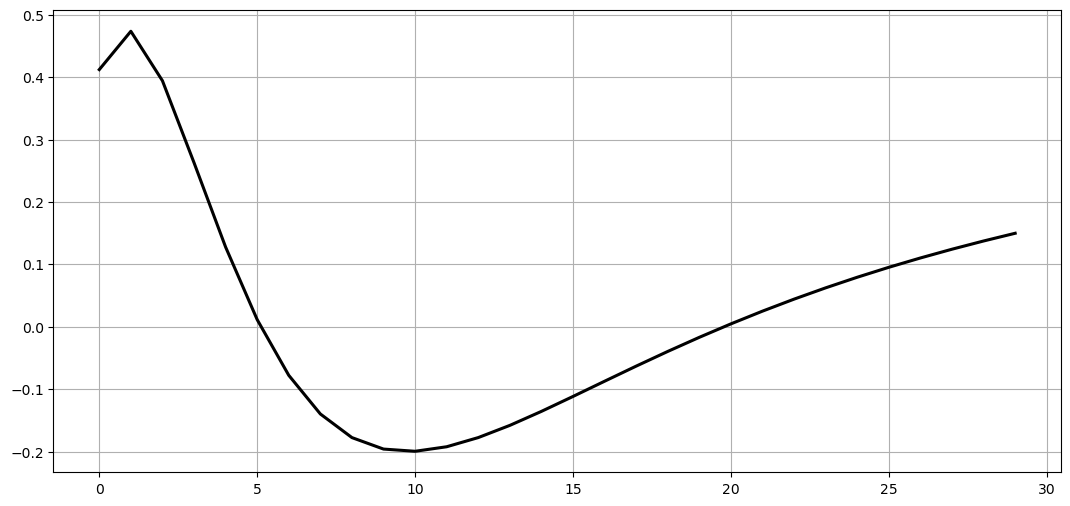

In [13]:
eig_vec = pca.components_ # Extract the Eigenvectors 
print("Eigenvectors are:")
print(eig_vec)

plt.figure(figsize=(13, 6))
plt.plot(eig_vec[2,:], "k", linewidth=2.2) 
plt.grid()
plt.show()

In [15]:
# Check for correctness

eig_vec_1 = eig_vec[0,:]
eig_val_1 = eig_val[0]

if (np.round(cov_mat @ eig_vec_1, 8) == np.round(eig_val_1 * eig_vec_1, 8)).all():
    print("Check is ok")
else:
    print("Error")

Check is ok


### 4. Principal components effects on the Yield curve

In [30]:
last_yield = yield_curve.iloc[-1].values # Select the yield curve relative to the last available date

In [31]:
# PC1 - Parallel shift #The entries of the first eigenvector have the same sign. Then
#the first principal component represents a parallel shift of the
#term structure where all rates move in the same direction. It
#accounts for most of the variability of the term structure.

F_1_a = 1 # Shock factor 
F_1_b = -1 # Shock factor 

shock_1_a = eig_vec[0] * np.sqrt(eig_val[0]) * F_1_a # Shock
shock_1_b = eig_vec[0] * np.sqrt(eig_val[0]) * F_1_b # Shock

next_yield_1_a = last_yield + shock_1_a 
next_yield_1_b = last_yield + shock_1_b 

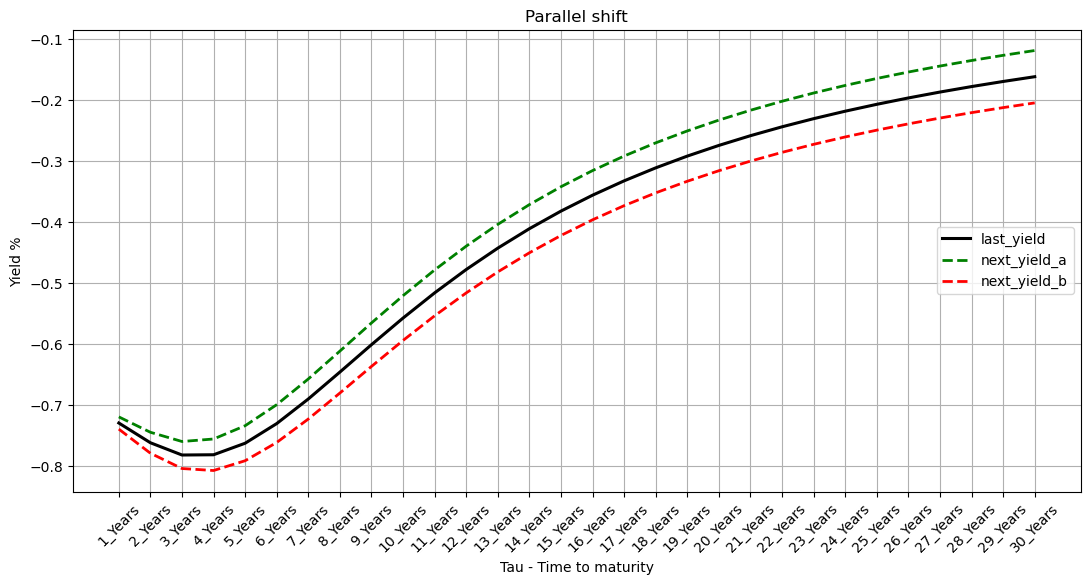

In [32]:
# Plots 

plt.figure(figsize=(13, 6))
plt.plot(tau_list, last_yield, "k", linewidth=2.2, label='last_yield')
plt.plot(tau_list, next_yield_1_a, "g--", linewidth=2, label='next_yield_a')
plt.plot(tau_list, next_yield_1_b, "r--", linewidth=2, label='next_yield_b')
plt.legend(loc='right')
plt.xticks(rotation=45)
plt.grid()
plt.title('Parallel shift')
plt.ylabel('Yield %')
plt.xlabel('Tau - Time to maturity')
plt.show()

In [37]:
# PC2 - Twist #The entries of the second eigenvector are either
#(+ + + . . . − −−) or (− − − . . . + ++). Then the second
#principal component represents a twist of the term structure
#where the rates at short maturities move in the opposite
#direction with respect to the rates at longer maturities.

F_2_a = 10 # Shock factor 
F_2_b = -10 # Shock factor 

shock_2_a = eig_vec[1] * np.sqrt(eig_val[1]) * F_2_a # Shock
shock_2_b = eig_vec[1] * np.sqrt(eig_val[1]) * F_2_b # Shock

next_yield_2_a = last_yield + shock_2_a 
next_yield_2_b = last_yield + shock_2_b 

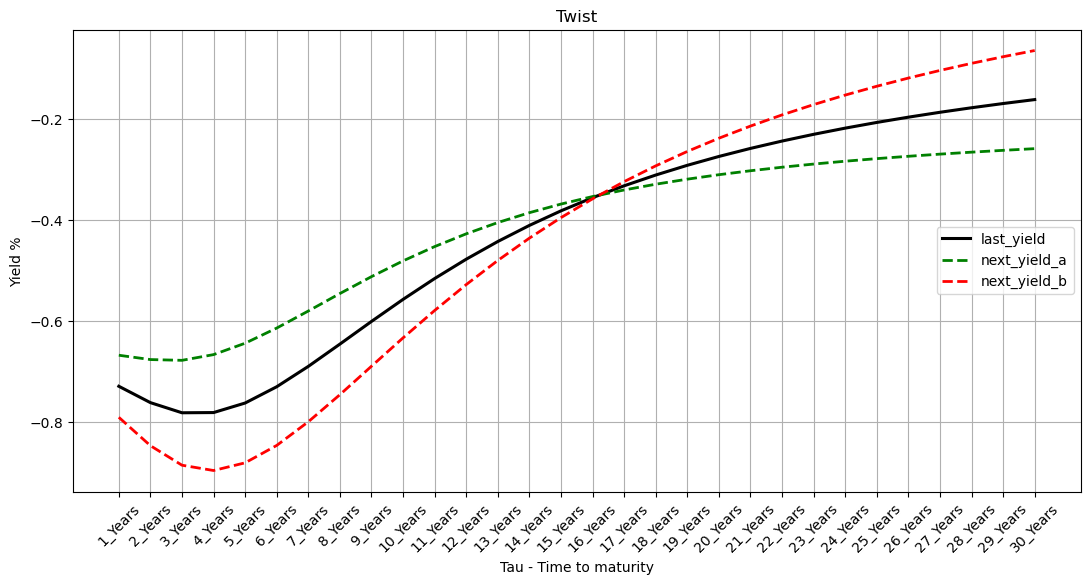

In [38]:
# Plots 

plt.figure(figsize=(13, 6))
plt.plot(tau_list, last_yield, "k", linewidth=2.2, label='last_yield')
plt.plot(tau_list, next_yield_2_a, "g--", linewidth=2, label='next_yield_a')
plt.plot(tau_list, next_yield_2_b, "r--", linewidth=2, label='next_yield_b')
plt.legend(loc='right')
plt.xticks(rotation=45)
plt.grid()
plt.title('Twist')
plt.ylabel('Yield %')
plt.xlabel('Tau - Time to maturity')
plt.show()

In [39]:
# PC3 - Butterfly #The entries of the third eigenvector are either
#(+ + + . . . − − − . . . + ++) or (− − − . . . + + + . . . − −−).
#Then the third principal component represents a butterfly
#movement of the term structure where the short and long
#maturity rates move in the opposite direction with respect to
#the medium maturity rates.

F_3_a = 10 # Shock factor 
F_3_b = -10 # Shock factor 

shock_3_a = eig_vec[2] * np.sqrt(eig_val[2]) * F_3_a # Shock
shock_3_b = eig_vec[2] * np.sqrt(eig_val[2]) * F_3_b # Shock

next_yield_3_a = last_yield + shock_3_a 
next_yield_3_b = last_yield + shock_3_b 

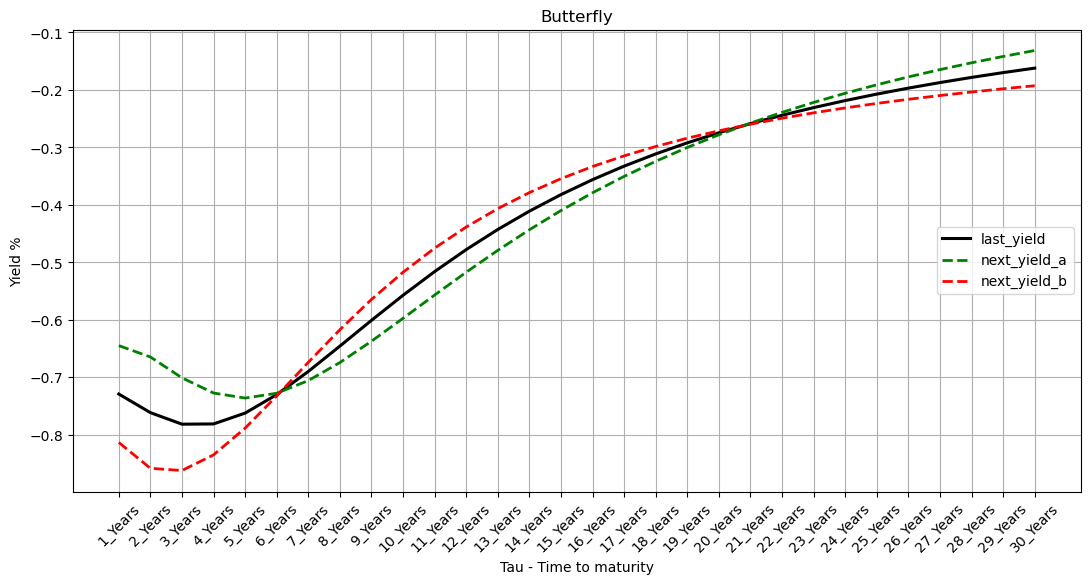

In [40]:
# Plots 

plt.figure(figsize=(13, 6))
plt.plot(tau_list, last_yield, "k", linewidth=2.2, label='last_yield')
plt.plot(tau_list, next_yield_3_a, "g--", linewidth=2, label='next_yield_a')
plt.plot(tau_list, next_yield_3_b, "r--", linewidth=2, label='next_yield_b')
plt.legend(loc='right')
plt.xticks(rotation=45)
plt.grid()
plt.title('Butterfly')
plt.ylabel('Yield %')
plt.xlabel('Tau - Time to maturity')
plt.show()